# Análise sobre dados alimentícios dos EUA utilizando plataforma Kaggle
## Projeto 4 - Estrutura de dados
### Matheus da Cruz Oliveira dos Santos - github.com/matheuscosantos - FATEC SJC

Este trabalho teve como objetivo elaborar uma análise de dados, usando dados públicos. Sendo assim, foi escolhida uma base de dados aberta, que se encontra hospedada no site Kaggle[1], contendo informações nutricionais de diversos alimentos produzidos e vendidos no mundo, informações essas, coletadas pelo Open Food Facts[2], iniciativa que tem como missão coletar informações de alimentos do mundo todo. 
Para o tratamento e exibição dos dados, foi utilizado o Jupyter Notebook que está incluso no Kaggle, permitindo um maior desempenho do processamento, já que estão hospedados em serviços em nuvem.
Existe uma base de dados da UNICAMP, chamada Tabela Brasileira de Composição de Alimentos, TACO, que poderá futuramente, ser utilizada para realizar a mesma análise feita nesse trabalho.

## Bibliotecas utilizadas
* matplotlib (Plotagem dos gráficos)
* pandas (Manipulação e análise de estruturas de dados de alta performance)
* os (Manipulação de diretórios)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import os
diretorios = os.listdir("../input")

df = pd.read_csv('../input/en.openfoodfacts.org.products.tsv',delimiter='\t',encoding='utf-8')
df = df.drop(['creator','created_t','last_modified_datetime','last_modified_t','url','created_datetime','no_nutriments', 'additives_n','ingredients_from_palm_oil_n','ingredients_from_palm_oil','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil','nutrition_grade_uk'], axis=1)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
colunas = []

for coluna in df.columns:
    colunas.append(coluna.replace('-','_'))
    
df.columns = colunas

### Total de produtos cadastrados por país

In [3]:
df_countrys = df.groupby(df.countries_en).count()
df_countrys = df_countrys.sort_values(by='code',ascending=False)
df_countrys = df_countrys.code.head(5)
df_countrys = df_countrys.to_frame()
df_countrys.columns = ['total_of_products']
print(df_countrys)

               total_of_products
countries_en                    
United States             173159
France                    123961
Switzerland                14932
Germany                     8470
Spain                       5529


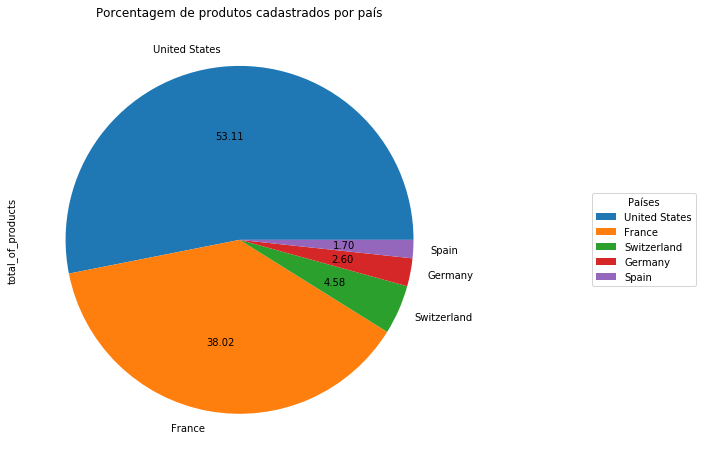

In [4]:
df_countrys.plot.pie(y=('total_of_products'), figsize=(8, 8),autopct='%.2f', title="Porcentagem de produtos cadastrados por país")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5), title="Países")

### Total de produtos vendidos por marcas nos Estados Unidos

In [5]:
df_only_us = df[df['countries_en']=='United States']
df_brands = df_only_us.groupby(df_only_us.brands)
df_brands = df_brands.count()
df_brands = df_brands.sort_values(by='code',ascending=False)
df_brands = df_brands.head(15)
df_brands = df_brands['code'].to_frame()
print(df_brands.head())

          code
brands        
Meijer    1995
Kroger    1659
Ahold     1370
Spartan   1341
Roundy's  1299


### Porcentagem dos produtos vendidos por marcas Estados Unidos

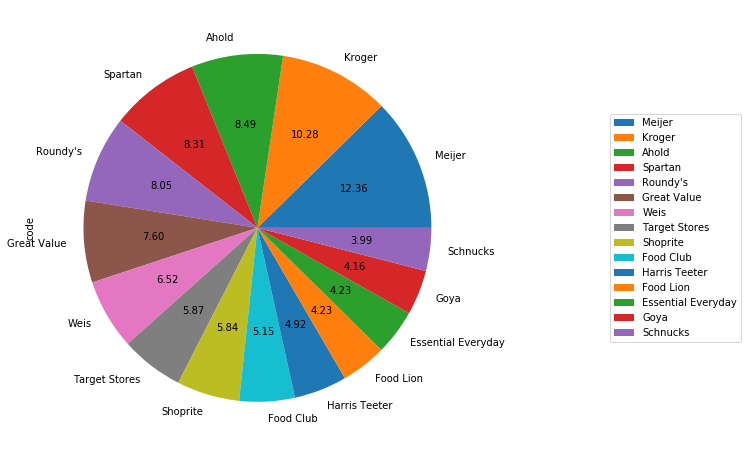

In [6]:
df_brands.plot.pie(y=('code'), figsize=(8, 8),autopct='%.2f')
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

### Quantidade de gordura saturada em cada 100g, agrupadas por marcas de produtos

In [7]:
df_us_saturated_fat = df_only_us.reset_index()
df_us_saturated_fat = df_us_saturated_fat[['brands','saturated_fat_100g']]
df_us_saturated_fat = df_us_saturated_fat.groupby(['brands'])['saturated_fat_100g'].sum()
df_us_saturated_fat = df_us_saturated_fat.to_frame()
df_us_saturated_fat = df_us_saturated_fat.sort_values(by='saturated_fat_100g',ascending=False)
df_us_saturated_fat.head(10)

,saturated_fat_100g
brands,
Meijer,6198.010
Kroger,5481.590
Ahold,4694.350
Spartan,4540.330
Weis,4389.870
Great Value,4149.286
Roundy's,4023.640
Target Stores,3832.360
Shoprite,3601.690


### Quantidade de gordura em cada 100g, agrupadas por marcas de produtos

In [8]:
df_us_fat = df_only_us.reset_index()
df_us_fat = df_us_fat[['brands','fat_100g']]
df_us_fat = df_us_fat.groupby(['brands'])['fat_100g'].sum()
df_us_fat = df_us_fat.to_frame()
df_us_fat = df_us_fat.sort_values(by='fat_100g',ascending=False)
df_us_fat.head(10)

,fat_100g
brands,
Meijer,21214.150
Kroger,18049.870
Roundy's,15569.020
Ahold,14587.660
Spartan,13870.400
Great Value,12530.594
Target Stores,12315.130
Weis,11501.770
Shoprite,11203.890


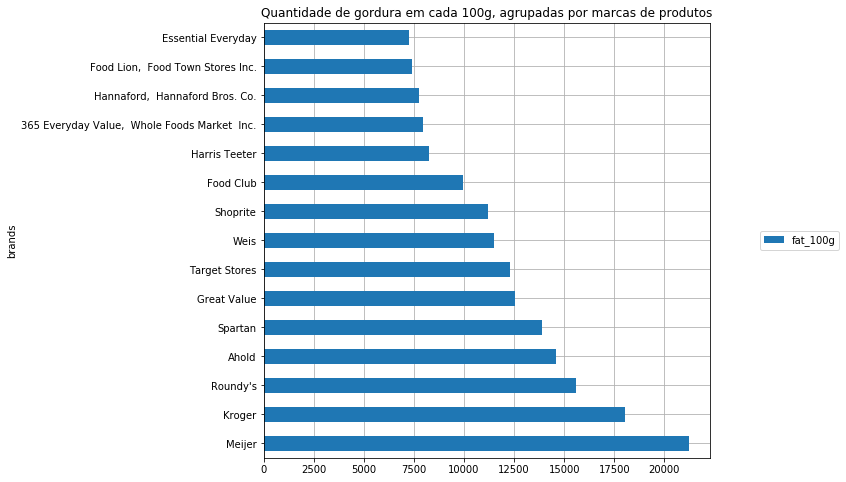

In [9]:
df_us_fat.head(15).plot.barh(figsize=(8, 8),grid=True, title="Quantidade de gordura em cada 100g, agrupadas por marcas de produtos").set_axisbelow(True)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

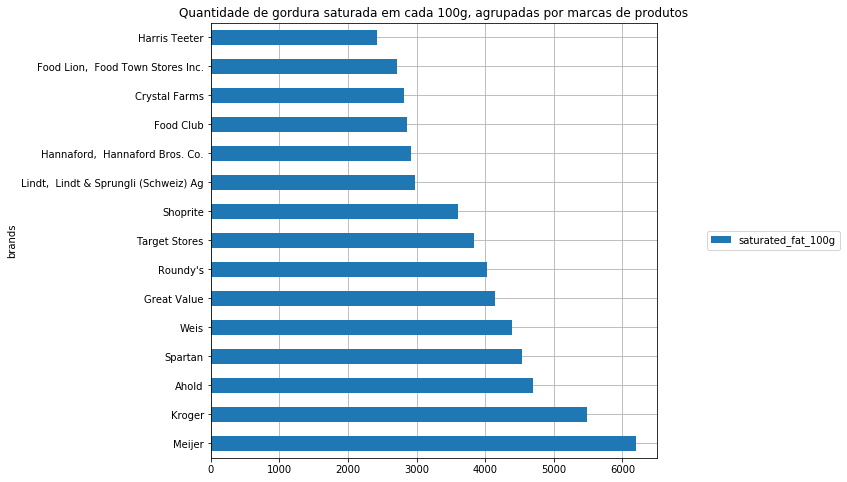

In [10]:
df_us_saturated_fat.head(15).plot.barh(figsize=(8, 8),grid=True, title="Quantidade de gordura saturada em cada 100g, agrupadas por marcas de produtos").set_axisbelow(True)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

### Quantidade de gordura normal e saturada em cada 100g, agrupadas por marcas de produtos

In [11]:
df_only_us['sum'] = df_only_us[['fat_100g','saturated_fat_100g']].astype(float).sum(axis=1)
df_us_sum_fat = df_only_us.groupby(['brands'])['sum'].sum()
df_us_sum_fat = df_us_sum_fat.to_frame()
df_us_sum_fat = df_us_sum_fat.sort_values(by='sum',ascending=False)
df_us_sum_fat.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sum
brands,
Meijer,27412.16
Kroger,23531.46
Roundy's,19592.66
Ahold,19282.01
Spartan,18410.73
Great Value,16679.88
Target Stores,16147.49
Weis,15891.64
Shoprite,14805.58


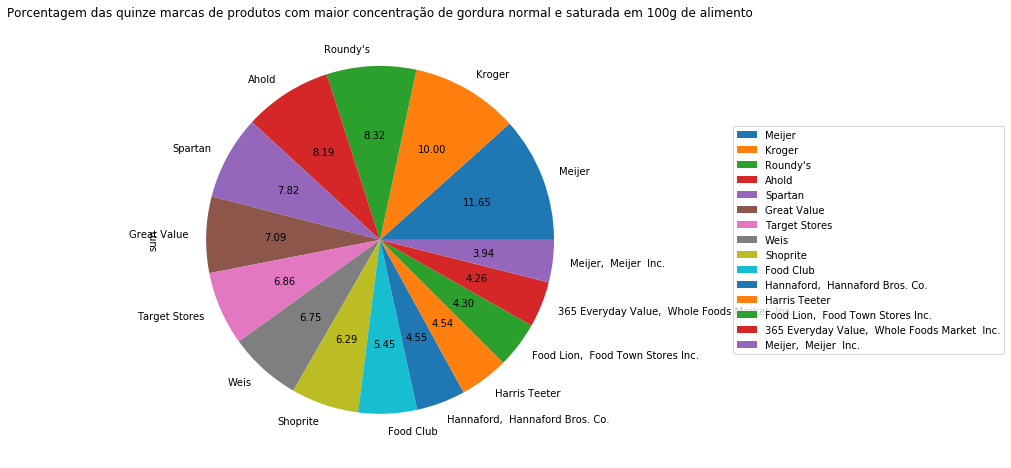

In [12]:
df_us_sum_fat.head(15).plot.pie(y=('sum'), figsize=(8, 8), title="Porcentagem das quinze marcas de produtos com maior concentração de gordura normal e saturada em 100g de alimento",autopct='%.2f')
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

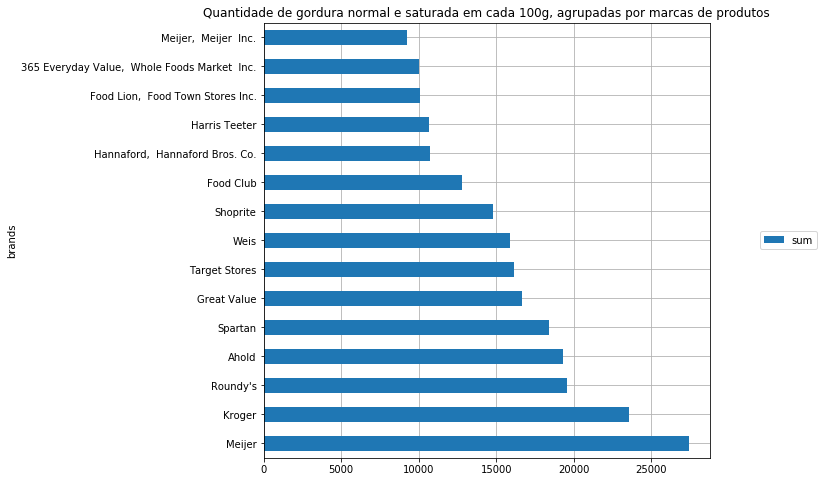

In [13]:
df_us_sum_fat.head(15).plot.barh(figsize=(8, 8),grid=True, title="Quantidade de gordura normal e saturada em cada 100g, agrupadas por marcas de produtos").set_axisbelow(True)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))